In [1]:
############################
## Data About Admissions ###
############################

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [3]:
### Read csv file ###

In [4]:
file_name = 'ADMISSIONS.csv'
admissions_data = pd.read_csv(file_name)
print(admissions_data.head(5))

   ROW_ID  SUBJECT_ID  HADM_ID            ADMITTIME            DISCHTIME  \
0      21          22   165315  2196-04-09 12:26:00  2196-04-10 15:54:00   
1      22          23   152223  2153-09-03 07:15:00  2153-09-08 19:10:00   
2      23          23   124321  2157-10-18 19:34:00  2157-10-25 14:00:00   
3      24          24   161859  2139-06-06 16:14:00  2139-06-09 12:48:00   
4      25          25   129635  2160-11-02 02:06:00  2160-11-05 14:55:00   

  DEATHTIME ADMISSION_TYPE         ADMISSION_LOCATION  \
0       NaN      EMERGENCY       EMERGENCY ROOM ADMIT   
1       NaN       ELECTIVE  PHYS REFERRAL/NORMAL DELI   
2       NaN      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
3       NaN      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
4       NaN      EMERGENCY       EMERGENCY ROOM ADMIT   

          DISCHARGE_LOCATION INSURANCE LANGUAGE           RELIGION  \
0  DISC-TRAN CANCER/CHLDRN H   Private      NaN       UNOBTAINABLE   
1           HOME HEALTH CARE  Medicare      NaN           CA

In [5]:
### General Information ###

In [6]:
print(admissions_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ROW_ID                58976 non-null  int64 
 1   SUBJECT_ID            58976 non-null  int64 
 2   HADM_ID               58976 non-null  int64 
 3   ADMITTIME             58976 non-null  object
 4   DISCHTIME             58976 non-null  object
 5   DEATHTIME             5854 non-null   object
 6   ADMISSION_TYPE        58976 non-null  object
 7   ADMISSION_LOCATION    58976 non-null  object
 8   DISCHARGE_LOCATION    58976 non-null  object
 9   INSURANCE             58976 non-null  object
 10  LANGUAGE              33644 non-null  object
 11  RELIGION              58518 non-null  object
 12  MARITAL_STATUS        48848 non-null  object
 13  ETHNICITY             58976 non-null  object
 14  EDREGTIME             30877 non-null  object
 15  EDOUTTIME             30877 non-null

In [7]:
### Counting people die at hospital (HOSPITAL_EXPIRE_FLAG = 1) ###
die_hospital_num = admissions_data[admissions_data['HOSPITAL_EXPIRE_FLAG']==1].shape[0]
print("Number of people dying at hospital: ", die_hospital_num)

Number of people dying at hospital:  5854


In [8]:
### Counting people die outside hospital (HOSPITAL_EXPIRE_FLAG = 0) ###
not_die_hospital_num = admissions_data[admissions_data['HOSPITAL_EXPIRE_FLAG']==0].shape[0]
print("Number of people not dying at hospital: ", not_die_hospital_num)

Number of people not dying at hospital:  53122


In [9]:
### Counting people who have chart information ###
chart_count = admissions_data[admissions_data['HAS_CHARTEVENTS_DATA'] == 1].shape[0]
print("Number of people who have chart information: ", chart_count)

Number of people who have chart information:  57384


In [10]:
### Counting people who don't have chart information ###
no_chart_count = admissions_data[admissions_data['HAS_CHARTEVENTS_DATA'] == 0].shape[0]
print("Number of people who don't have chart information: ", no_chart_count)

Number of people who don't have chart information:  1592


In [11]:
### Information about Marriage ###

In [12]:
marriage_counts = admissions_data['MARITAL_STATUS'].value_counts()
print(marriage_counts)

MARITAL_STATUS
MARRIED              24239
SINGLE               13254
WIDOWED               7211
DIVORCED              3213
SEPARATED              571
UNKNOWN (DEFAULT)      345
LIFE PARTNER            15
Name: count, dtype: int64


In [13]:
### Create MARITAL_STATUS_FREQUENCY column ###
admissions_data['MARITAL_STATUS_FREQUENCY'] = admissions_data['MARITAL_STATUS'].map(marriage_counts)
print(admissions_data.head(5))

   ROW_ID  SUBJECT_ID  HADM_ID            ADMITTIME            DISCHTIME  \
0      21          22   165315  2196-04-09 12:26:00  2196-04-10 15:54:00   
1      22          23   152223  2153-09-03 07:15:00  2153-09-08 19:10:00   
2      23          23   124321  2157-10-18 19:34:00  2157-10-25 14:00:00   
3      24          24   161859  2139-06-06 16:14:00  2139-06-09 12:48:00   
4      25          25   129635  2160-11-02 02:06:00  2160-11-05 14:55:00   

  DEATHTIME ADMISSION_TYPE         ADMISSION_LOCATION  \
0       NaN      EMERGENCY       EMERGENCY ROOM ADMIT   
1       NaN       ELECTIVE  PHYS REFERRAL/NORMAL DELI   
2       NaN      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
3       NaN      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
4       NaN      EMERGENCY       EMERGENCY ROOM ADMIT   

          DISCHARGE_LOCATION INSURANCE LANGUAGE           RELIGION  \
0  DISC-TRAN CANCER/CHLDRN H   Private      NaN       UNOBTAINABLE   
1           HOME HEALTH CARE  Medicare      NaN           CA

In [14]:
### Creating Bar Chart for MARITAL_STATUS and FREQUENCY ###

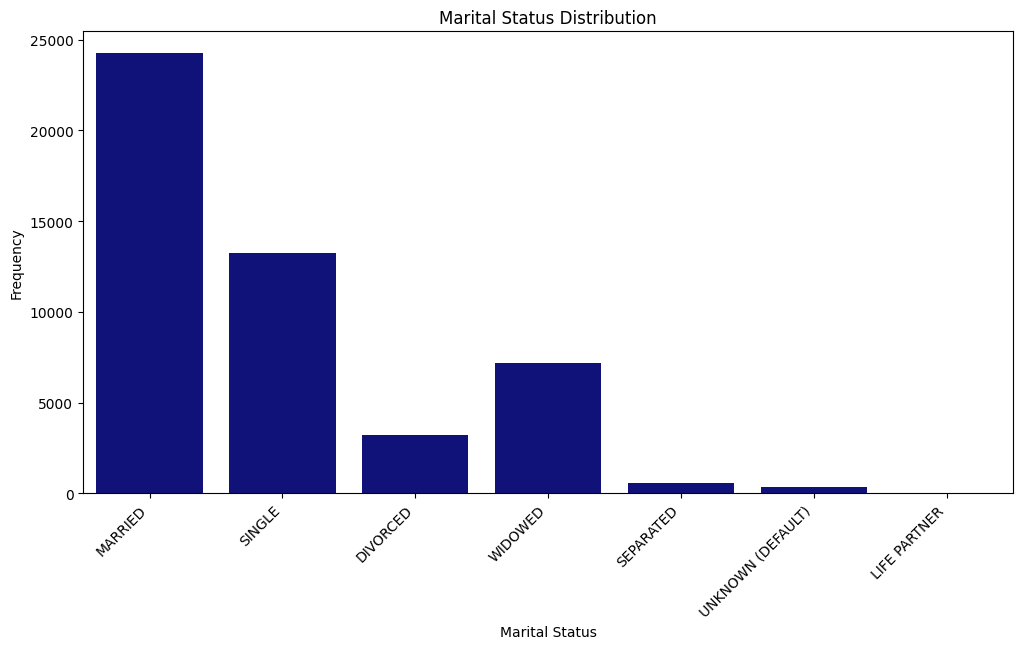

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(x='MARITAL_STATUS', y='MARITAL_STATUS_FREQUENCY', data=admissions_data, color='darkblue')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [16]:
### Ethnicity Information ###

In [17]:
ethnics_counts = admissions_data['ETHNICITY'].value_counts()
print(ethnics_counts)

ETHNICITY
WHITE                                                       40996
BLACK/AFRICAN AMERICAN                                       5440
UNKNOWN/NOT SPECIFIED                                        4523
HISPANIC OR LATINO                                           1696
OTHER                                                        1512
ASIAN                                                        1509
UNABLE TO OBTAIN                                              814
PATIENT DECLINED TO ANSWER                                    559
ASIAN - CHINESE                                               277
HISPANIC/LATINO - PUERTO RICAN                                232
BLACK/CAPE VERDEAN                                            200
WHITE - RUSSIAN                                               164
MULTI RACE ETHNICITY                                          130
BLACK/HAITIAN                                                 101
ASIAN - ASIAN INDIAN                                           85


In [18]:
### Create ETHNICS_FREQUENCY column ###
admissions_data['ETHNICS_FREQUENCY'] = admissions_data['ETHNICITY'].map(ethnics_counts)
print(admissions_data.head(5))

   ROW_ID  SUBJECT_ID  HADM_ID            ADMITTIME            DISCHTIME  \
0      21          22   165315  2196-04-09 12:26:00  2196-04-10 15:54:00   
1      22          23   152223  2153-09-03 07:15:00  2153-09-08 19:10:00   
2      23          23   124321  2157-10-18 19:34:00  2157-10-25 14:00:00   
3      24          24   161859  2139-06-06 16:14:00  2139-06-09 12:48:00   
4      25          25   129635  2160-11-02 02:06:00  2160-11-05 14:55:00   

  DEATHTIME ADMISSION_TYPE         ADMISSION_LOCATION  \
0       NaN      EMERGENCY       EMERGENCY ROOM ADMIT   
1       NaN       ELECTIVE  PHYS REFERRAL/NORMAL DELI   
2       NaN      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
3       NaN      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
4       NaN      EMERGENCY       EMERGENCY ROOM ADMIT   

          DISCHARGE_LOCATION INSURANCE  ...           RELIGION MARITAL_STATUS  \
0  DISC-TRAN CANCER/CHLDRN H   Private  ...       UNOBTAINABLE        MARRIED   
1           HOME HEALTH CARE  Medicare

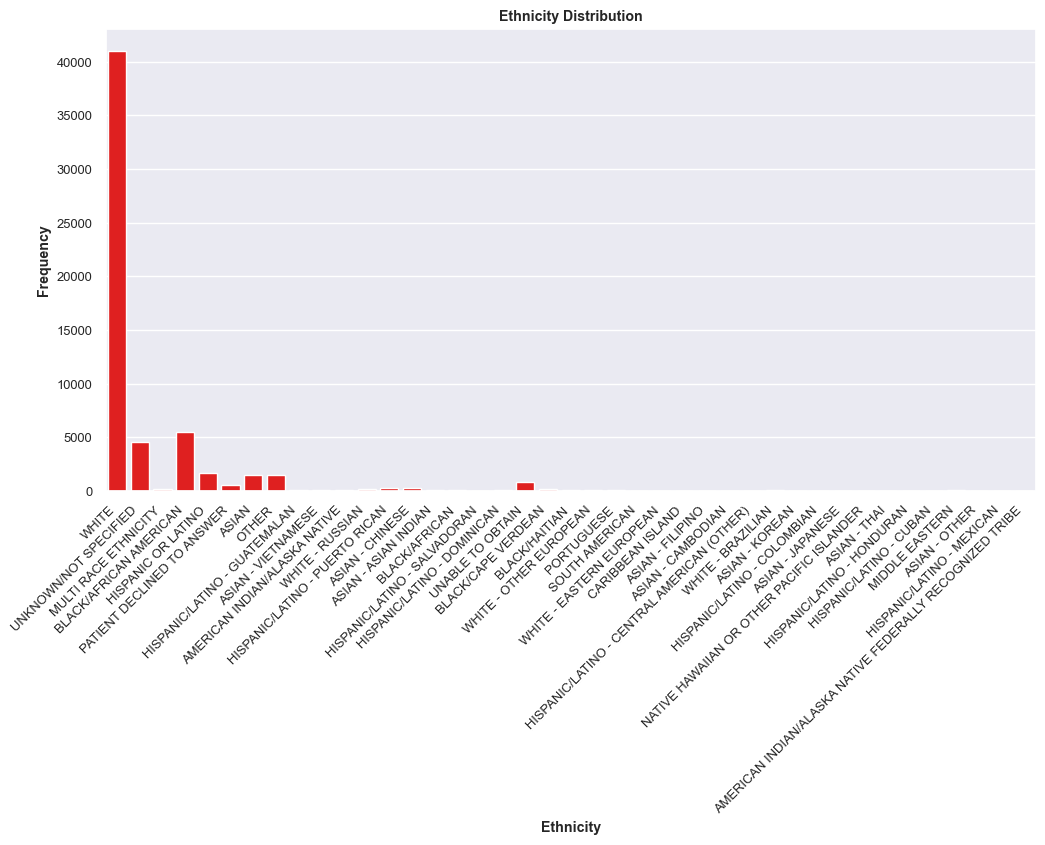

In [19]:
### Creating Bar Chart for ETHNICITY and ETHNICS_FREQUENCY ###
plt.figure(figsize=(12, 6))
sns.set(font_scale=0.85)  
sns.barplot(x='ETHNICITY', y='ETHNICS_FREQUENCY', data=admissions_data, color='red')
plt.title('Ethnicity Distribution', fontweight='bold')
plt.xlabel('Ethnicity', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.show()

In [20]:
### Information about Diagnosis ###

In [21]:
diagnosis_count = admissions_data['DIAGNOSIS'].value_counts()

In [22]:
print(diagnosis_count)

DIAGNOSIS
NEWBORN                                  7823
PNEUMONIA                                1566
SEPSIS                                   1184
CONGESTIVE HEART FAILURE                  928
CORONARY ARTERY DISEASE                   840
                                         ... 
DIAPHRAGM RUPTURE                           1
RIGHT ANTERIOR CEREBRAL ARTERY STROKE       1
HYPOXIA, ACUTE RENAL FAILURE                1
S/P MOTOR VECHICLE ACCIDENT                 1
JOINT EFFUSION                              1
Name: count, Length: 15691, dtype: int64


In [23]:
### Create DIAGNOSIS_FREQUENCY Column ###

In [24]:
admissions_data['DIAGNOSIS_FREQUENCY'] = admissions_data['DIAGNOSIS'].map(diagnosis_count)
print(admissions_data.head(5))

   ROW_ID  SUBJECT_ID  HADM_ID            ADMITTIME            DISCHTIME  \
0      21          22   165315  2196-04-09 12:26:00  2196-04-10 15:54:00   
1      22          23   152223  2153-09-03 07:15:00  2153-09-08 19:10:00   
2      23          23   124321  2157-10-18 19:34:00  2157-10-25 14:00:00   
3      24          24   161859  2139-06-06 16:14:00  2139-06-09 12:48:00   
4      25          25   129635  2160-11-02 02:06:00  2160-11-05 14:55:00   

  DEATHTIME ADMISSION_TYPE         ADMISSION_LOCATION  \
0       NaN      EMERGENCY       EMERGENCY ROOM ADMIT   
1       NaN       ELECTIVE  PHYS REFERRAL/NORMAL DELI   
2       NaN      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
3       NaN      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
4       NaN      EMERGENCY       EMERGENCY ROOM ADMIT   

          DISCHARGE_LOCATION INSURANCE  ... MARITAL_STATUS ETHNICITY  \
0  DISC-TRAN CANCER/CHLDRN H   Private  ...        MARRIED     WHITE   
1           HOME HEALTH CARE  Medicare  ...        MARRI

In [26]:
emergency_counts = admissions_data['ADMISSION_TYPE'].value_counts()

In [27]:
print(emergency_counts)

ADMISSION_TYPE
EMERGENCY    42071
NEWBORN       7863
ELECTIVE      7706
URGENT        1336
Name: count, dtype: int64


In [28]:
admissions_data['EMERGENCY_FREQUENCY'] = admissions_data['ADMISSION_TYPE'].map(emergency_counts)

In [29]:
print(admissions_data.head(5))

   ROW_ID  SUBJECT_ID  HADM_ID            ADMITTIME            DISCHTIME  \
0      21          22   165315  2196-04-09 12:26:00  2196-04-10 15:54:00   
1      22          23   152223  2153-09-03 07:15:00  2153-09-08 19:10:00   
2      23          23   124321  2157-10-18 19:34:00  2157-10-25 14:00:00   
3      24          24   161859  2139-06-06 16:14:00  2139-06-09 12:48:00   
4      25          25   129635  2160-11-02 02:06:00  2160-11-05 14:55:00   

  DEATHTIME ADMISSION_TYPE         ADMISSION_LOCATION  \
0       NaN      EMERGENCY       EMERGENCY ROOM ADMIT   
1       NaN       ELECTIVE  PHYS REFERRAL/NORMAL DELI   
2       NaN      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
3       NaN      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
4       NaN      EMERGENCY       EMERGENCY ROOM ADMIT   

          DISCHARGE_LOCATION INSURANCE  ... ETHNICITY            EDREGTIME  \
0  DISC-TRAN CANCER/CHLDRN H   Private  ...     WHITE  2196-04-09 10:06:00   
1           HOME HEALTH CARE  Medicare  ... 

In [31]:
### Creating bar chart for EMERGENCY_TYPE and EMERGENCY_FREQUENCY ###

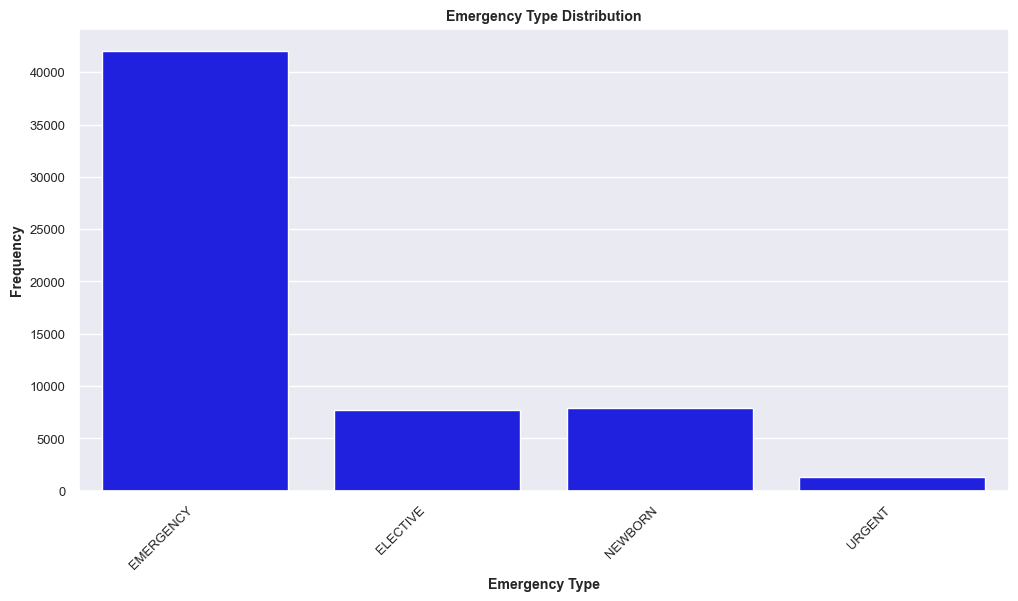

In [32]:
plt.figure(figsize=(12, 6))
sns.set(font_scale=0.85)  

sns.barplot(x='ADMISSION_TYPE', y='EMERGENCY_FREQUENCY', data=admissions_data, color='blue')

plt.title('Emergency Type Distribution', fontweight='bold')
plt.xlabel('Emergency Type', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.show()

In [33]:
### DISCHARGE_LOCATION Information ###

In [34]:
discharge_location_counts = admissions_data['DISCHARGE_LOCATION'].value_counts()

In [35]:
print(discharge_location_counts)

DISCHARGE_LOCATION
HOME                         18962
HOME HEALTH CARE             13963
SNF                           7705
REHAB/DISTINCT PART HOSP      6429
DEAD/EXPIRED                  5854
LONG TERM CARE HOSPITAL       2305
SHORT TERM HOSPITAL           1534
DISC-TRAN CANCER/CHLDRN H      669
DISCH-TRAN TO PSYCH HOSP       446
HOSPICE-HOME                   402
LEFT AGAINST MEDICAL ADVI      365
HOSPICE-MEDICAL FACILITY       153
HOME WITH HOME IV PROVIDR       67
OTHER FACILITY                  63
ICF                             47
DISC-TRAN TO FEDERAL HC         11
SNF-MEDICAID ONLY CERTIF         1
Name: count, dtype: int64


In [36]:
admissions_data['DISCHARGE_LOCATION_FREQ'] = admissions_data['DISCHARGE_LOCATION'].map(discharge_location_counts) 

In [37]:
print(admissions_data.head(5))

   ROW_ID  SUBJECT_ID  HADM_ID            ADMITTIME            DISCHTIME  \
0      21          22   165315  2196-04-09 12:26:00  2196-04-10 15:54:00   
1      22          23   152223  2153-09-03 07:15:00  2153-09-08 19:10:00   
2      23          23   124321  2157-10-18 19:34:00  2157-10-25 14:00:00   
3      24          24   161859  2139-06-06 16:14:00  2139-06-09 12:48:00   
4      25          25   129635  2160-11-02 02:06:00  2160-11-05 14:55:00   

  DEATHTIME ADMISSION_TYPE         ADMISSION_LOCATION  \
0       NaN      EMERGENCY       EMERGENCY ROOM ADMIT   
1       NaN       ELECTIVE  PHYS REFERRAL/NORMAL DELI   
2       NaN      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
3       NaN      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
4       NaN      EMERGENCY       EMERGENCY ROOM ADMIT   

          DISCHARGE_LOCATION INSURANCE  ...            EDREGTIME  \
0  DISC-TRAN CANCER/CHLDRN H   Private  ...  2196-04-09 10:06:00   
1           HOME HEALTH CARE  Medicare  ...                  NaN

In [38]:
### Creating bar chart for DISCHARGE_LOCATION and DISCHARGE_FREQUENCY ###

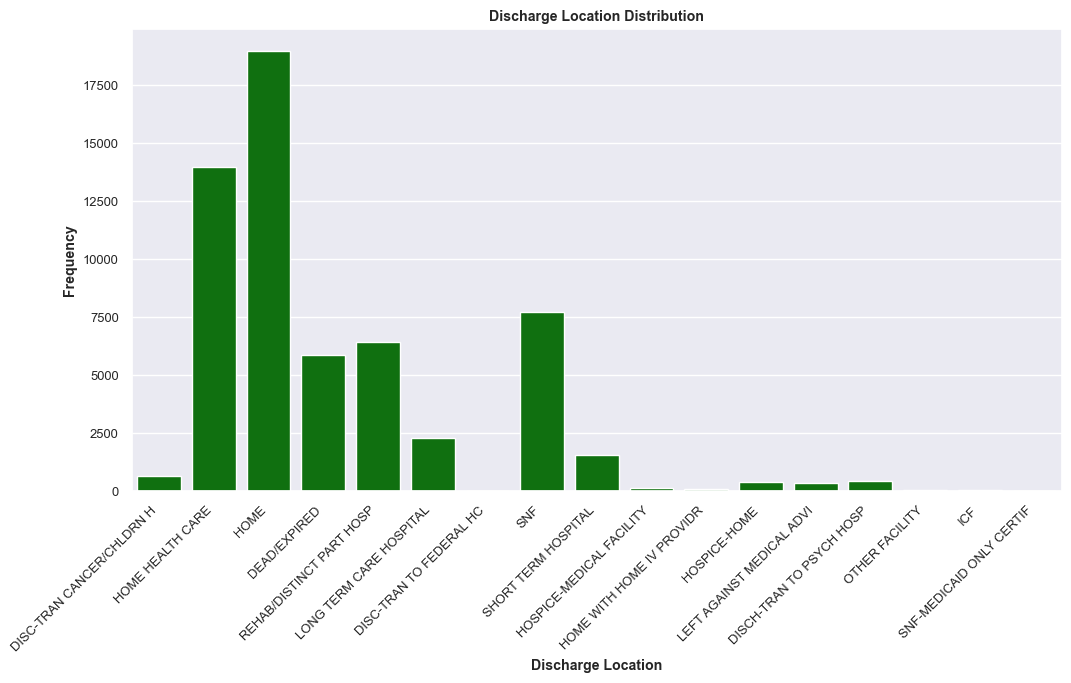

In [39]:
plt.figure(figsize=(12, 6))
sns.set(font_scale=0.85)  

sns.barplot(x='DISCHARGE_LOCATION', y='DISCHARGE_LOCATION_FREQ', data=admissions_data, color='green')

plt.title('Discharge Location Distribution', fontweight='bold')
plt.xlabel('Discharge Location', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.show()

In [41]:
### Insurance information ###

In [43]:
insurance_type_counts = admissions_data['INSURANCE'].value_counts()

In [44]:
print(insurance_type_counts)

INSURANCE
Medicare      28215
Private       22582
Medicaid       5785
Government     1783
Self Pay        611
Name: count, dtype: int64


In [46]:
admissions_data['INSURANCE_TYPE_FREQ'] = admissions_data['INSURANCE'].map(insurance_type_counts) 

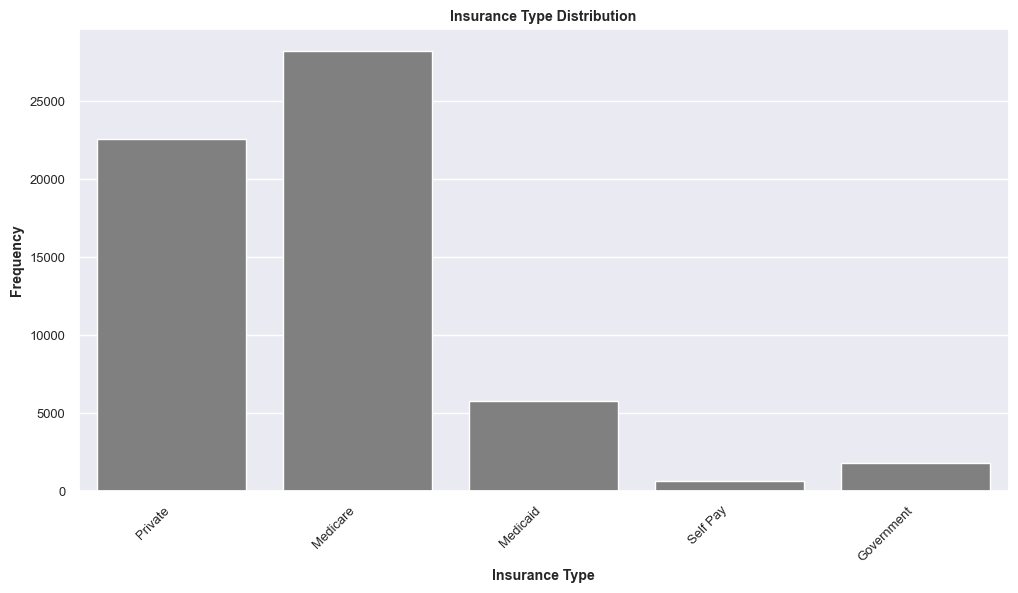

In [48]:
plt.figure(figsize=(12, 6))
sns.set(font_scale=0.85)  

sns.barplot(x='INSURANCE', y='INSURANCE_TYPE_FREQ', data=admissions_data, color='grey')

plt.title('Insurance Type Distribution', fontweight='bold')
plt.xlabel('Insurance Type', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.show()

In [51]:
### ADMITIME and DISCHTIME Information ###

In [53]:
### Convert them to datetime objects using datetime module ###

In [65]:
admissions_data['ADMITTIME'] = pd.to_datetime(admissions_data['ADMITTIME'])
admissions_data['DISCHTIME'] = pd.to_datetime(admissions_data['DISCHTIME'])

# Calculate duration of stay
admissions_data['STAY_DURATION'] = admissions_data['DISCHTIME'] - admissions_data['ADMITTIME']

# Convert duration to hours 
admissions_data['DURATION_HOURS'] = admissions_data['STAY_DURATION'].dt.total_seconds() / 3600


In [69]:
admissions_data['DURATION_HOURS'] = admissions_data['DURATION_HOURS'].astype(int)

# Calculate frequency of each unique duration
duration_frequency = admissions_data['DURATION_HOURS'].value_counts().sort_index()

# Create 'DURATION_FREQUENCY' column based on the calculated frequencies
admissions_data['DURATION_FREQUENCY'] = admissions_data['DURATION_HOURS'].map(duration_frequency)

In [76]:
print(admissions_data['DURATION_FREQUENCY'])

### 120 people stay for 1 hour, 219 people stay for 2 hours, etc ###

0        103
1        120
2        219
3        261
4        153
        ... 
58971    208
58972     87
58973    142
58974      3
58975    113
Name: DURATION_FREQUENCY, Length: 58976, dtype: int64


In [77]:
print(admissions_data['DURATION_FREQUENCY'].max())

365


In [80]:
print(admissions_data['DURATION_FREQUENCY'].min())

1


In [55]:
### Creating Scatterplot ###

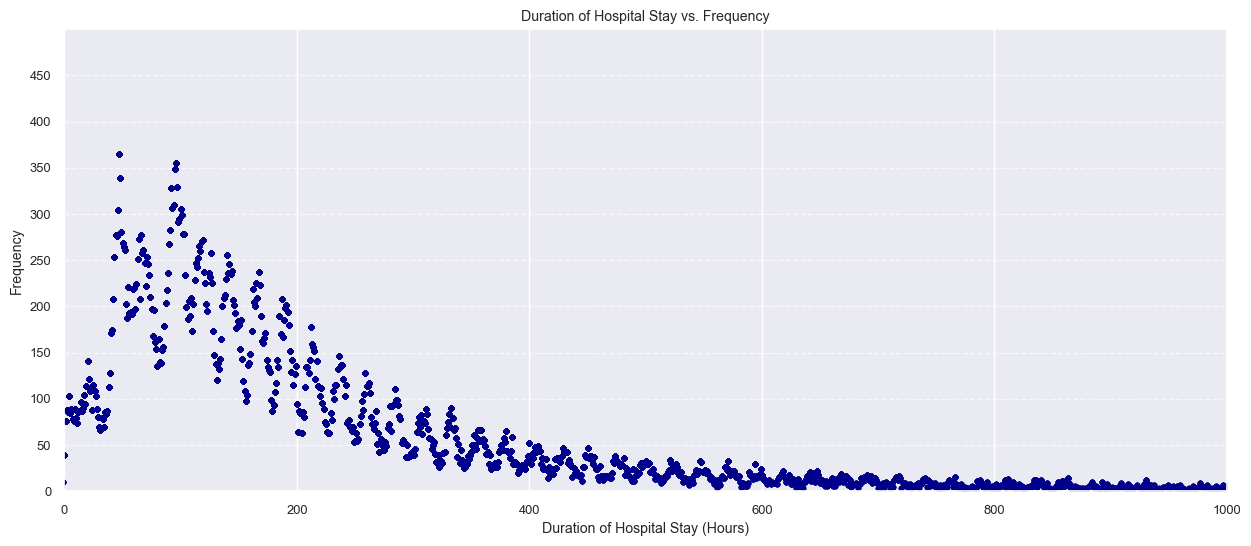

In [82]:
# Plot the duration using scatterplot ###
plt.figure(figsize=(15, 6))
plt.scatter(admissions_data['DURATION_HOURS'].dropna(), admissions_data['DURATION_FREQUENCY'], color='darkblue', marker='.')
plt.title('Duration of Hospital Stay vs. Frequency')
plt.xlabel('Duration of Hospital Stay (Hours)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(0, 1000)  # Set x-axis limits to 0 and 500 hours
plt.ylim(0, 500)
plt.yticks(range(0, 500, 50))
plt.show()
